In [16]:
class TravellingSalesmanProblem:
    def __init__(self, distance, start):
        self.distance_matrix = distance
        self.start_city = start
        self.total_cities = len(distance)

        self.end_state = (1 << self.total_cities) - 1
        self.memo = [[None for _col in range(1 << self.total_cities)] for _row in range(self.total_cities)]

        self.shortest_path = []
        self.min_path_cost = float('inf')

    def solve(self):
        self.__initialize_memo()

        for num_element in range(3, self.total_cities + 1):

            for subset in self.__initiate_combination(num_element):

                if self.__is_not_in_subset(self.start_city, subset):
                    continue

                for next_city in range(self.total_cities):

                    if next_city == self.start_city or self.__is_not_in_subset(next_city, subset):
                        continue

                    subset_without_next_city = subset ^ (1 << next_city)
                    min_distance = float('inf')

                    for last_city in range(self.total_cities):

                        if last_city == self.start_city or \
                                last_city == next_city or \
                                self.__is_not_in_subset(last_city, subset):
                            continue

                        new_distance = \
                            self.memo[last_city][subset_without_next_city] + self.distance_matrix[last_city][next_city]

                        if new_distance < min_distance:
                            min_distance = new_distance

                    self.memo[next_city][subset] = min_distance

        self.__calculate_min_cost()
        self.__find_shortest_path()

    def __calculate_min_cost(self):
        for i in range(self.total_cities):

            if i == self.start_city:
                continue

            path_cost = self.memo[i][self.end_state]

            if path_cost < self.min_path_cost:
                self.min_path_cost = path_cost

    def __find_shortest_path(self):
        state = self.end_state

        for i in range(1, self.total_cities):
            best_index = -1
            best_distance = float('inf')

            for j in range(self.total_cities):

                if j == self.start_city or self.__is_not_in_subset(j, state):
                    continue

                new_distance = self.memo[j][state]

                if new_distance <= best_distance:
                    best_index = j
                    best_distance = new_distance

            self.shortest_path.append(best_index)
            state = state ^ (1 << best_index)

        self.shortest_path.append(self.start_city)
        self.shortest_path.reverse()

    def __initialize_memo(self):
        for destination_city in range(self.total_cities):

            if destination_city == self.start_city:
                continue

            self.memo[destination_city][1 << self.start_city | 1 << destination_city] = \
                self.distance_matrix[self.start_city][destination_city]

    def __initiate_combination(self, num_element):
        subset_list = []
        self.__initialize_combination(0, 0, num_element, self.total_cities, subset_list)
        return subset_list

    def __initialize_combination(self, subset, at, num_element, total_cities, subset_list):

        elements_left_to_pick = total_cities - at
        if elements_left_to_pick < num_element:
            return

        if num_element == 0:
            subset_list.append(subset)
        else:
            for i in range(at, total_cities):
                subset |= 1 << i
                self.__initialize_combination(subset, i + 1, num_element - 1, total_cities, subset_list)
                subset &= ~(1 << i)

    @staticmethod
    def __is_not_in_subset(element, subset):
        return ((1 << element) & subset) == 0


if __name__ == '__main__':
    distance_matrix = [
        [0, 328, 259, 180, 314, 294, 269, 391],
        [328, 0, 83, 279, 107, 131, 208, 136],
        [259, 83, 0, 257, 70, 86, 172, 152],
        [180, 279, 257, 0, 190, 169, 157, 273],
        [314, 107, 70, 190, 0, 25, 108, 182],
        [294, 131, 86, 169, 25, 0, 84, 158],
        [269, 208, 172, 157, 108, 84, 0, 140],
        [391, 136, 152, 273, 182, 158, 140, 0],
    ]
    start_city = 0

    tour = TravellingSalesmanProblem(distance_matrix, start_city)
    tour.solve()

    print("Shortest path :", tour.shortest_path)
    print("Minimum path cost :", tour.min_path_cost)

Shortest path : [0, 3, 6, 5, 4, 2, 1, 7]
Minimum path cost : 735


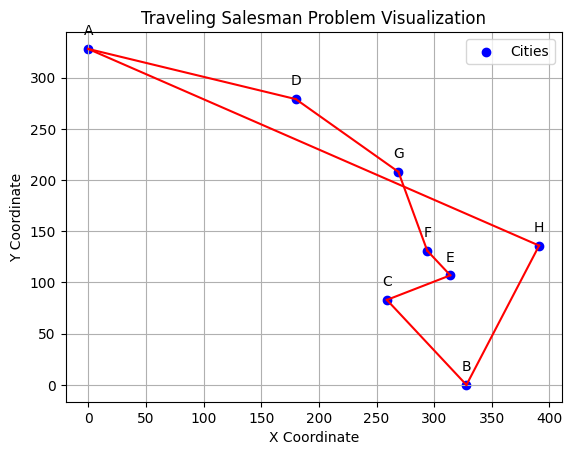

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual distance matrix

# Cities
cities = ['A', 'B', 'C', 'D','E','F','G','H']

# Example TSP route
route = [0, 3, 6, 5, 4, 2, 1, 7]  # Assuming indices correspond to cities

# Extract coordinates from the distance matrix for plotting
x_coords = [coord[0] for coord in distance_matrix]
y_coords = [coord[1] for coord in distance_matrix]

# Create a scatter plot of cities
plt.scatter(x_coords, y_coords, color='blue', label='Cities')

# Annotate city names
for i, city in enumerate(cities):
    plt.annotate(city, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Draw lines between cities to represent the TSP route
for i in range(len(route) - 1):
    x_values = [x_coords[route[i]], x_coords[route[i + 1]]]
    y_values = [y_coords[route[i]], y_coords[route[i + 1]]]
    plt.plot(x_values, y_values, color='red')

# Connect the last city back to the starting city
x_values = [x_coords[route[-1]], x_coords[route[0]]]
y_values = [y_coords[route[-1]], y_coords[route[0]]]
plt.plot(x_values, y_values, color='red')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Traveling Salesman Problem Visualization')
plt.legend()
plt.grid()
plt.show()


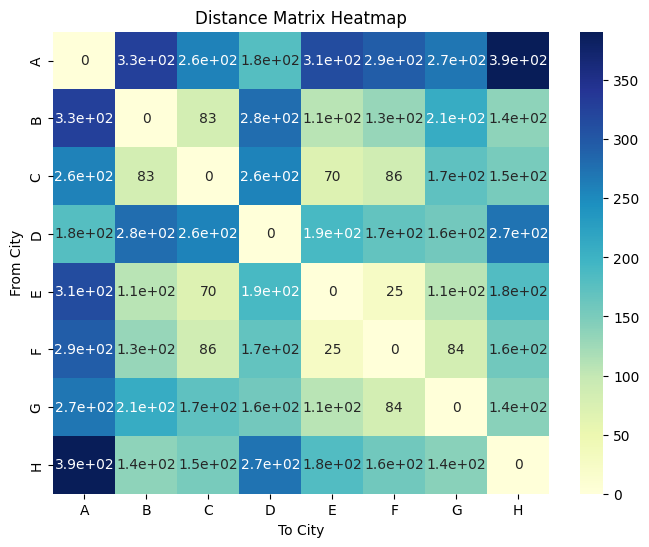

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace this with your actual distance matrix

# Cities
cities = ['A', 'B', 'C', 'D','E', 'F','G','H']

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, cmap='YlGnBu', xticklabels=cities, yticklabels=cities)
plt.xlabel('To City')
plt.ylabel('From City')
plt.title('Distance Matrix Heatmap')
plt.show()


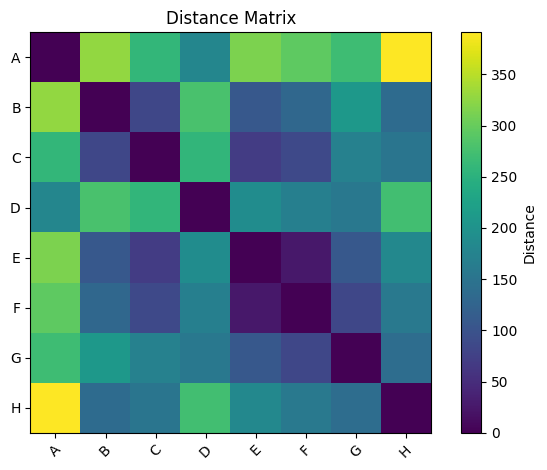

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Example distance matrix (replace this with your actual data)

plt.imshow(distance_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Distance')
plt.title('Distance Matrix')
plt.xticks(np.arange(len(cities)), cities, rotation=45)
plt.yticks(np.arange(len(cities)), cities)
plt.tight_layout()
plt.show()


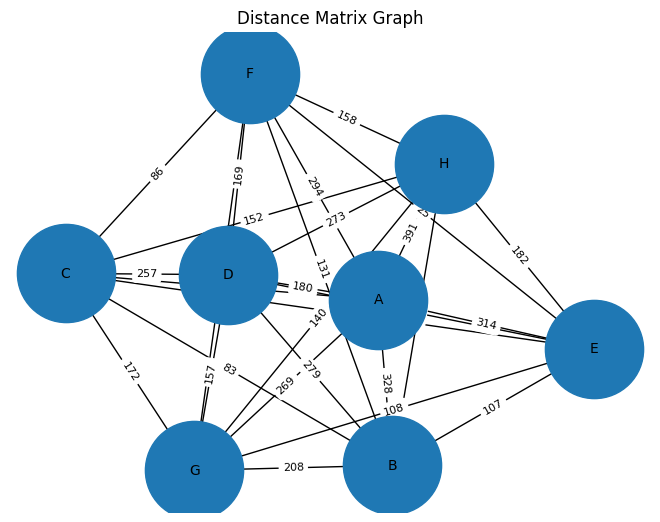

In [20]:
#pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Example distance matrix (replace this with your actual data)


# List of city names (replace with your city names)
city_names = ['A', 'B', 'C', 'D','E','F','G','H']

# Create a weighted graph
G = nx.Graph()

# Add nodes (cities)
for city in city_names:
    G.add_node(city)

# Add edges with distances as weights
for i in range(len(city_names)):
    for j in range(i + 1, len(city_names)):
        G.add_edge(city_names[i], city_names[j], weight=distance_matrix[i][j])

# Set positions for graph layout
pos = nx.spring_layout(G)

# Extract edge weights for labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=5000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Distance Matrix Graph')
plt.show()


In [21]:
# -*- coding: utf-8 -*-


import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt, time


def evaldistance(city1, city2):
    x = abs(city1[0] - city2[0])
    y = abs(city2[1] - city2[1])

    # Calculating Euclidean Distance
    distance = np.sqrt((x ** 2) + (y ** 2))

    return distance


# Evaluates fitness
class Fitness:

    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0

    def EvalDistance(self):

        if self.distance == 0:

            # Current Distance
            currDistance = 0

            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None

                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]

                currDistance += evaldistance(fromCity, toCity)

            self.distance = currDistance

        return self.distance

    # Evaluates current route fitness ## No memory usage here
    def routeFitness(self):

        # Because we want minimum distance therefore we take inverse
        if self.fitness == 0:
            self.fitness = 1 / float(self.EvalDistance())
        return self.fitness


# Generates random routes

def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route


# Generates population

def initialPopulation(popSize, cities):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cities))

    return population


def rankRoutes(population):
    fitnessResults = {}
    for i in range(0, len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()

    return sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True)


def selection(popRanked, eliteSize):
    selectionResults = []

    df = pd.DataFrame(np.array(popRanked), columns=["Index", "Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])

    for i in range(0, len(popRanked) - eliteSize):
        pick = 100 * random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i, 3]:
                selectionResults.append(popRanked[i][0])
                break

    var = len(selectionResults) + len(df) + 1
    return selectionResults, var


def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool


def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child


def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool) - i - 1])
        children.append(child)
    return children


def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if (random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1
    return individual


def mutatePopulation(population, mutationRate):
    mutatedPop = []

    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop


def nextGeneration(currentGen, eliteSize, mutationRate):
    memory = 0

    popRanked = rankRoutes(currentGen)

    memory += len(popRanked) + 7

    selectionResults, memUsage = selection(popRanked, eliteSize)

    memory += memUsage

    matingpool = matingPool(currentGen, selectionResults)

    memory += len(matingpool)

    children = breedPopulation(matingpool, eliteSize)

    memory += len(children) + 2

    nextGeneration = mutatePopulation(children, mutationRate)

    memory += len(nextGeneration) + 2
    return nextGeneration, memory


def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    memory = 0
    pop = initialPopulation(popSize, population)
    # print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    memory += len(pop)

    for i in range(0, generations):
        pop, mem = nextGeneration(pop, eliteSize, mutationRate)

    memory += mem
    # print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))

    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]

    memory += 1 + len(bestRoute)

    return bestRoute, memory

In [22]:
n = 10


cities = [(2,45), (45,37), (9,29), (57,49), (23,27), (29,7), (38,31), (77,0), (4,68), (16,99)]

In [23]:
createRoute(cities)

[(9, 29),
 (23, 27),
 (29, 7),
 (57, 49),
 (4, 68),
 (16, 99),
 (38, 31),
 (45, 37),
 (2, 45),
 (77, 0)]